In [1]:
### XOR
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
xor_data = np.array([[1, 0],
                    [0, 1],
                    [1, 1],
                    [0, 0]])
xor_label = np.array([[1], [1], [0], [0]])

In [2]:
with tf.Graph().as_default() as g:
    with tf.name_scope("model"):
        x_input = tf.placeholder(tf.float32, [None, 2])
        y_label = tf.placeholder(tf.float32, [None, 1])
    
        w1 = tf.Variable(tf.random_normal(shape = (2,4),name = "Weight1"))
        b1 = tf.Variable(tf.random_normal(shape = (1,4),name = "Bias1"))
    
        hidden_layer = tf.sigmoid(tf.matmul(x_input , w1) + b1)
    
        w2 = tf.Variable(tf.random_normal(shape = (4,1),name = "Weight1"))
        b2 = tf.Variable(tf.random_normal(shape = (1,1),name = "Bias2"))
    
    
        output_layer = tf.sigmoid(tf.matmul(hidden_layer , w2) +b2)
        pass

    with tf.name_scope("loss"):
        mse = tf.losses.mean_squared_error(y_label , output_layer)
        pass
    
    with tf.name_scope("optimaizer"):
        optimizer = tf.train.AdamOptimizer(learning_rate = 0.1).minimize(mse)
        pass
    # start building your model and meet the requirements
    # from here
    
with tf.Session(graph=g) as sess:
    # start run the seesion and meet the requrements
    # from here 
    sess.run(tf.global_variables_initializer())
    epochs = 500
    for epoch in range(epochs+1):
        sess.run(optimizer,feed_dict={x_input: xor_data,y_label: xor_label})

    #print(sess.run(output_layer, feed_dict={x_input: xor_data}))
    
    pred = sess.run(output_layer, feed_dict={x_input: xor_data})
    #print(pred)
    
    
    for i in range(pred.shape[0]):
        if (pred[i][0] > 0.5):
            pred[i][0] = 1
        else:
            pred[i][0] = 0
    #print(pred)
    print("Layer1_Weight:\n {}".format(sess.run(w1)))
    print("Layer1_Bias:\n {}".format(sess.run(b1)))
    print("Layer2_Weight:\n {}".format(sess.run(w2)))
    print("Layer2_Bias:\n {}".format(sess.run(b2)))
    print("Accuracy: {}".format(accuracy_score(xor_label, pred)))
    #print(pred.shape)
    pass

Layer1_Weight:
 [[ 8.835011   6.835361  -5.23937   -4.8972363]
 [-5.395621  -8.310999   6.441631  -7.268155 ]]
Layer1_Bias:
 [[ 1.1194189 -3.4533658  3.0287666  1.1107148]]
Layer2_Weight:
 [[-8.433711 ]
 [ 8.415017 ]
 [-1.1020945]
 [-5.195134 ]]
Layer2_Bias:
 [[5.2797003]]
Accuracy: 1.0


In [3]:
### MNIST
from tensorflow.examples.tutorials.mnist import input_data
# load mnist data
mnist = input_data.read_data_sets("data/mnist", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist\train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting data/mnist\train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting data/mnist\t10k-images-idx3-ubyte.gz
Extracting data/mnist\t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [4]:
print("training data size: {}".format(mnist.train.num_examples))
print("validation data size: {}".format(mnist.validation.num_examples))
print("testing data size: {}".format(mnist.test.num_examples))

print("Shape of image: {}".format(mnist.train.images[0].shape))
print("Shape of label: {}".format(mnist.train.labels[0].shape))
#print(mnist.test.images[0])


training data size: 55000
validation data size: 5000
testing data size: 10000
Shape of image: (784,)
Shape of label: (10,)


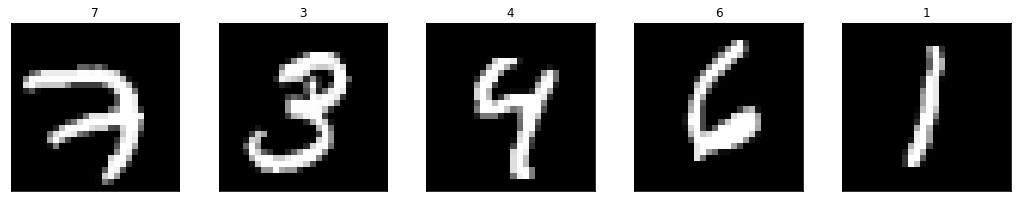

In [5]:
n = 5
plt.figure(figsize=(18,18))
for i in range(5):
    plt.subplot(n, n, i+1)
    plt.imshow(mnist.train.images[i].reshape(28,28), cmap='gray')
    plt.title(np.argmax(mnist.train.labels[i]))
    plt.xticks([])
    plt.yticks([])
plt.show()

In [7]:
#setting
feature_dims = 784 # example with 784 features
neurons = 256 # fully connected layer with 1024 neurons
classes = 10 # 10 classes classification problem
batch_size = 128

with tf.Graph().as_default() as g:
    ## meet the requirements
    ## then you will
    """ Define dataset and iterator """
    with tf.name_scope("data"):
        
        training_dataset = tf.data.Dataset.from_tensor_slices((mnist.train.images, mnist.train.labels))
        training_dataset = training_dataset.batch(batch_size)
        ## Create a `iterator` to extract elements from `dataset`
        training_iterator = training_dataset.make_initializable_iterator()
        x_input, y_label = training_iterator.get_next()
        pass
    
    """ Build the model """
        
    with tf.name_scope("model"):
        ##fully connected 
        x = tf.placeholder(tf.float32, [None, 784])
        y_ = tf.placeholder(tf.float32, [None, 10])

        w1 = tf.get_variable("weight1", shape=[784, neurons],initializer=tf.random_normal_initializer)
        b1 = tf.get_variable("bias1", shape=[neurons],initializer=tf.random_normal_initializer)
        hidden_layer_1 = tf.nn.relu(tf.matmul(x, w1) + b1)
        
        w2 = tf.get_variable("weight2",shape = [neurons,neurons],initializer=tf.random_normal_initializer)
        b2 = tf.get_variable("bias2",shape = [neurons],initializer=tf.random_normal_initializer)
        hidden_layer_2 =  tf.nn.relu(tf.matmul(hidden_layer_1, w2) + b2)
        
        w3 = tf.get_variable("weight3",shape = [neurons,classes],initializer=tf.random_normal_initializer)
        b3 = tf.get_variable("bias3",shape = [classes],initializer=tf.random_normal_initializer)
        logits = tf.matmul(hidden_layer_2, w3) + b3
        prediction = tf.nn.softmax(logits)
        
        pass

    """ Define the loss """
    with tf.name_scope("loss"):
        cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=y_))
        pass
#tensorflow训练神经网络的时候,初学者往往也会遇到网络崩溃的情况.具体的表现是,出现了nan(not a number).
#这个情况一般是由于进行交叉熵运算时,出现了log(0). referance:
#https://blog.csdn.net/ljhandlwt/article/details/77334450?fbclid=IwAR0rgfzDDYiWhy7o7pZB8ZS0XL39zJgyCXJemYb7KzD8tuZlTQCvfK9oNI4
    
    """ Define the optimizer """
    with tf.name_scope("optimizer"):
        train_step = tf.train.AdamOptimizer(learning_rate = 0.005).minimize(cross_entropy)
        pass
    
    """ Other tensors or operations you need """
    with tf.name_scope("accuracy"):
        correct_prediction = tf.equal(tf.argmax(prediction, 1), tf.argmax(y_, 1))
        accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
        pass
    

config = tf.ConfigProto()
config.gpu_options.allow_growth = True # avoids occupying full memory of GPU    

with tf.Session(config = config , graph=g) as sess:
    ## just do it
    sess.run(tf.global_variables_initializer())
    
    epochs = 10
    for i in range(1,epochs+1):
        print("Epoch: {}".format(i))
        sess.run(training_iterator.initializer) # initialize the iterator
        try:
            while(True):
                X_input_train,y_label_train = sess.run([x_input,y_label])
                #print("X: {}".format(X_input_train))
                #print("y: {}".format(y_label_train))
                sess.run(train_step,feed_dict={x: X_input_train, y_: y_label_train})    
        except tf.errors.OutOfRangeError:
            pass
        
        valid_acc = sess.run(accuracy,feed_dict={x: mnist.validation.images, y_: mnist.validation.labels})
        test_acc = sess.run(accuracy,feed_dict={x: mnist.test.images, y_: mnist.test.labels})
        print("Valid Acc: %.3f"%valid_acc)
        print("Test Acc: %.3f"%test_acc)
    pass

Epoch: 1
Valid Acc: 0.922
Test Acc: 0.919
Epoch: 2
Valid Acc: 0.933
Test Acc: 0.934
Epoch: 3
Valid Acc: 0.944
Test Acc: 0.939
Epoch: 4
Valid Acc: 0.946
Test Acc: 0.947
Epoch: 5
Valid Acc: 0.948
Test Acc: 0.946
Epoch: 6
Valid Acc: 0.948
Test Acc: 0.946
Epoch: 7
Valid Acc: 0.949
Test Acc: 0.944
Epoch: 8
Valid Acc: 0.949
Test Acc: 0.950
Epoch: 9
Valid Acc: 0.959
Test Acc: 0.955
Epoch: 10
Valid Acc: 0.960
Test Acc: 0.959
